



Multiple prophet predictions using priors


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/michaelm/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/michaelm/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/michaelm/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -16.0909
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1140.79   3.12509e-08       3210.17      0.5773      0.5773      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       1140.79   9.02589e-08       3405.71   2.499e-11       0.001      178  LS failed, Hessian reset 
     108       1140.79   4.42548e-09       3096.58       0.216       0.216      183   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -16.0909
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1318.44    0.00355258       256.758           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103        1319.1    0.00146941       276.254   6.088e-06       0.00

/Users/michaelm/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/michaelm/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/michaelm/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/7z/lks_pjcd1fv91v27m8gf5l1h0000gn/T/ipykernel_86662/3153903523.py:212: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.



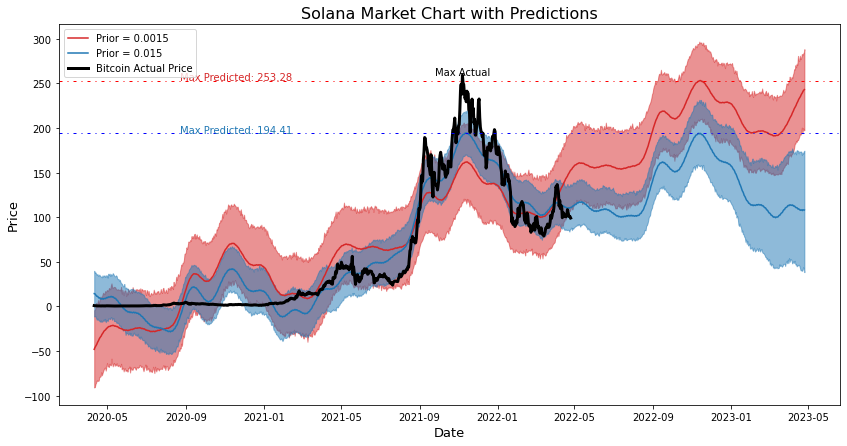

In [36]:
import time
import datetime

import requests
import os

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

import matplotlib.pyplot as plt
%matplotlib inline

from prophet import Prophet

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

os.listdir()

class Crypto():
    
    def __init__(self, crypto, historic_date, lst_of_cryps=None, days=None):
        self.crypto = crypto
        self.historic_date = historic_date
        self.lst_of_cryps = lst_of_cryps
        self.days=days
    
    def base_api_req(self):
        return requests.get(f"https://api.coingecko.com/api/v3/coins/{self.crypto}").json()
    
    def find_crypto_stats(self): 

        cryp_req = self.base_api_req()

        if('error' in cryp_req):
            print("Crypto not found in coingeck.api")
        else:

            for stat in [cryp_req]: 
                print("\033[1mLoading " +stat['name']+" stats......\033[0m\n")
                time.sleep(2)
                try:
                    # price
                    print("\033[1m"+stat['name']+": $"+str(stat["market_data"]["current_price"]["usd"])+'\033[0m')
                    # symbol
                    print(str(self.crypto)+"'s symbol is -- "+stat['symbol']) 
                    # hashing algorithm
                    print(stat['symbol']+" uses a "+stat['hashing_algorithm']+" hashing algorithm.") 
                    # market cap and total vol
                    print("Market cap -- "+str(stat['market_data']['market_cap']['usd'])+"      Volume -- "+str(stat['market_data']['total_volume']['usd'])) 
                    # market cap rank and dev score
                    print("Market cap rank -- "+str(stat['market_cap_rank'])+"       Developer score -- "+str(stat['developer_score'])) 
                    # subreddit url
                    print(stat['name']+"s official subreddit -- "+stat['links']['subreddit_url']) 

                except TypeError:
                    pass

                print(f"\033[1m\nSubreddit Details: ({self.historic_date})\033[0m")

                
                coin_hist_req = requests.get("https://api.coingecko.com/api/v3/coins/"+ str(stat['id'])+"/history?date="+str(self.historic_date)).json() 
                
                
                for past_detail in [coin_hist_req]:
                    
                    # avg subreddit users
                    print("Average posts per 48h -- "+str(past_detail['community_data']['reddit_average_posts_48h'])) 
                    # avg comments/48h
                    print("Average comments per 48h -- "+str(past_detail['community_data']['reddit_average_comments_48h'])) 
                    # subreddit subscribers
                    print('Total subs -- '+str(past_detail['community_data']['reddit_subscribers'])) 
                    # repository data
                    print('\n\033[1mRepos data:\033[0m\n'+'Total issues -- '+str(past_detail['developer_data']['total_issues'])+ "      Closed Issues -- "+str(past_detail['developer_data']['closed_issues'])) 

                ticker_request = requests.get("https://api.coingecko.com/api/v3/coins/"+stat['id']+"/tickers").json() 
                for ticker in [ticker_request['tickers']]: 
                    # tickers trust score
                    print("\n\033[1mTicker Details:\033[0m \n"+stat['name']+" trust score: "+ticker[0]['trust_score']) 
                    # bid-ask spread
                    print("Bid-ask spread: "+str(ticker[0]['bid_ask_spread_percentage'])+"%") 
                    print("Last traded at -- "+ticker[0]['last_traded_at'])
                    print("Trade URL -- "+ticker[0]['trade_url']+"\n")
                
                print("\033[1mDescription\033[0m: \n"+stat['description']['en']) 

    def evaluate_crypto(self, start_d, months, alpha, ticker):
        
        print(f"\033[1mLoading {self.crypto} evaluation...\033[0m\n")
        time.sleep(2)
        
        splt = start_d.split('-')
        start_date = datetime.datetime(int(splt[0]),int(splt[1]),int(splt[2]))
        end_date = datetime.datetime(int(splt[0]),int(splt[1])+1,int(splt[2]))

        month_df = pdr.get_data_yahoo(f'{ticker}-usd',start=start_date,end=end_date)['Adj Close'].reset_index()
        month_df['pct_chg'] = month_df['Adj Close'].pct_change()
        perc_chg = month_df['pct_chg'].mean()
        avg_mk = month_df['Adj Close'].mean()
        
        print(f'''Average Market Price over past {(end_date-start_date).days} days:\n \033[1m${avg_mk:.2f}\033[0m''')
        print(f'''Average percentage change over past {(end_date-start_date).days} days:\n \033[1m{perc_chg:.5f}%\033[0m''')
        
        if perc_chg > alpha:
            if perc_chg > 0:
                print(f'''\033[1mAverage percentage change ({perc_chg}%) is > your desired alpha ({alpha}%)\033[0m''')
        else:
            print(f'''\n\033[1mAverage % change is < your desired alpha({alpha}%)\033[0m''')
        
            
    def several_crypto_stats(self):
        
        if self.lst_of_cryps == None:
            pass
        else:
            for coin in self.lst_of_cryps:
                self.crypto = coin
                self.find_crypto_stats()
                print("\n\n\n\n")
                
        
    def see_price_in_currency(self):
        
        cur_and_price = []
        currencies = []  
        
        price_req = self.base_api_req()
        
        for num in [price_req]:
            cur_and_price.append((num['market_data']['current_price']))
            
        for i in cur_and_price: 
            for key, val in i.items():
                currencies.append(key)
                
        print(f"list of currencies: {currencies}")
        for num in [price_req]:
            curr = input(f"What currency would you like to see {self.crypto} in?\n")
            print("\nPrice in "+curr+": \033[1m"+str(num["market_data"]["current_price"][curr])+"\033[0m")
        
        
    # Time Series Forecasting using Prophet
    def prophet_model(self):
        
        cryp_ = requests.get(f"https://api.coingecko.com/api/v3/coins/{self.crypto}/market_chart/range?vs_currency=usd&from=946710000&to={self.convert_to_utc()}").json()
        ds_,y_ = [],[]
        for key, val in cryp_['prices']:
            ds_.append(key)
            y_.append(val)

        df = pd.DataFrame({'ds':ds_,'y':y_})

        df['ds'] = df['ds'].apply(lambda x: datetime.datetime.utcfromtimestamp(int(x)/1000).strftime('%Y-%m-%d'))
        df['ds'] = pd.to_datetime(df['ds'])

        # found these priors online
        priors = [0.0015, 0.015]
        labs_, models = [], []
        for p in priors:
            model = Prophet(changepoint_prior_scale=p)
            model.fit(df)
            models.append(model)
            labs_.append("Prior = " + str(p))

        preds = []
        for model, pri in zip(models,priors):
            pred = model.make_future_dataframe(periods=self.days, freq="D")
            pred = model.predict(pred)
            pred.rename(columns={"ds" : str(pri)},inplace=True)
            preds.append(pred)


        merged = preds[0].merge(preds[1],
                                left_on = "0.0015",
                                right_on = "0.015",
                                how = "inner"
                                )

        merged = merged.rename(columns={"0.0015": "Date"}).drop("0.015", axis=1)

        merged.set_index('Date', inplace=True)
        
        return merged,df,labs_
    
    
    # Main Plot
    def plot_cp_prediction(self):
        
        print("\033[1mMultiple prophet predictions using priors\033[0m")

        plot_data, df, labels = self.prophet_model()

        fig, ax = plt.subplots(1, 1, figsize=(14, 7))

        ax.plot(plot_data.index, 
                plot_data["yhat_x"], 
                label=labels[0],
                color='tab:red'
               )
        ax.fill_between(plot_data.index, 
                        plot_data["yhat_upper_x"], 
                        plot_data["yhat_lower_x"], 
                        alpha=0.5, 
                        edgecolor = "k",
                        color='tab:red'
                       )
        ax.plot(plot_data.index, 
                plot_data["yhat_y"], 
                "r", 
                label=labels[1],
                color='tab:blue'
               )
        ax.fill_between(plot_data.index, 
                        plot_data["yhat_upper_y"], 
                        plot_data["yhat_lower_y"], 
                        alpha=0.5, 
                        edgecolor = "k",
                        color='tab:blue'
                       )
        ax.plot(df['ds'], df['y'], 
                color="k", 
                linewidth=3, 
                label=r"Bitcoin Actual Price"
               )
        tdelta_, y_inc = self.scale_annot(df)
        
        mx, mx_ = max(plot_data['yhat_x']), max(plot_data['yhat_y'])
        idmx, idmx_ = plot_data['yhat_x'].idxmax(), plot_data['yhat_y'].idxmax()
        date, date_ = pd.to_datetime(idmx.normalize().strftime('%Y-%m-%d')), pd.to_datetime(idmx_.normalize().strftime('%Y-%m-%d'))

        ax.axhline(max(plot_data['yhat_x']),color='r',lw=1,ls=(0, (3, 5, 1, 5)))
        ax.text(x=date-datetime.timedelta(days=tdelta_),
                y=mx+y_inc,
                s=f'Max Predicted: {mx:.2f}',
                size='medium',
                c='tab:red',
                ha='center'
               )

        ax.axhline(max(plot_data['yhat_y']),color='b',lw=1,ls=(0, (3, 5, 1, 5)))
        ax.text(x=date-datetime.timedelta(days=tdelta_),
                y=mx_+y_inc,
                s=f'Max Predicted: {mx_:.2f}',
                size='medium',
                c='tab:blue',
                ha='center'
               )

        idm = df['y'].idxmax()
        dte = df.loc[idm]['ds']
        ax.text(x=dte,
                y=max(df['y'])+y_inc,
                s=f'Max Actual',
                size='medium',
                c='black',
                ha='center'
               )
        
        if self.crypto=='bitcoin':
            ax.axvline(datetime.datetime(2017,12,27), ls=(0, (1, 10)), lw=3,c='gray')
            ax.text(x=datetime.datetime(2017,12,27)+datetime.timedelta(days=20),
                    y=-15000,
                    s='Investors harvest \ngains',
                    ha='center', 
                    size=9,
                    c='k'
                   )

            ax.axvline(datetime.datetime(2021,5,12), ls=(0, (1, 10)), lw=3,c='gray')
            ax.text(x=datetime.datetime(2021,5,12)+datetime.timedelta(days=20),
                    y=-12000,
                    s="Tesla Won't Accept \nBitcoin",
                    ha='center', 
                    size=9,
                    c='k'
                   )
        
        plt.legend(loc="upper left")
        plt.ylabel("Price", size=13)
        plt.xlabel("Date", size=13)
        plt.title(f"{self.crypto.capitalize()} Market Chart with Predictions", size=16)
        plt.show()
        
        
    # Ticker Plot
    def ticker_plot(self):
        
        print("\033[1mAll-Time Ticker Plot\033[0m")
        
        x,df,_ = self.prophet_model()
        
        df['d_shift'] = df['y'].loc[1:]
        ls = df['d_shift'].to_list()
        
        ls.insert(0,np.nan)
        ls.pop()
        
        df['shifted'] = ls
        df['dif'] = df['shifted'] - df['d_shift']
        df['label'] = df['dif'].apply(lambda x: 'increase' if x < 0 else 'decrease')
        
        tk = px.line(data_frame=df,x='ds',y='y',width=1000, height=600,color='label',
                labels={
                     "ds":"Date",
                     "y":"Price",
                 },
                color_discrete_map={
                "increase": "green", "decrease": "red"
            },         
        )
        
        tk.update_layout(
            title={
            'text': f"{self.crypto.capitalize()} Market Chart",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}
        )
        
        tk.update_xaxes(rangeslider_visible=True)
        tk.show()
    
    
    # helper
    def scale_annot(self, df):
        
        if max(df['y']) > 10000:
            tdelta_ = 2700
            y_inc = 1500
        elif max(df['y']) > 2500:
            tdelta_ = 1800
            y_inc = 100
        elif max(df['y']) > 350:
            tdelta_ = 2500
            y_inc = 10
        elif max(df['y']) > 2.9:
            tdelta_ = 725
            y_inc = .09
        elif max(df['y']) > .67:
            tdelta_ = 2500
            y_inc = .01
        else:
            tdelta_ = 700
            y_inc = .000001

        return tdelta_,y_inc
    
    
    # getting current utc timestamp
    @staticmethod
    def convert_to_utc():
        
        cur_date = datetime.datetime.now().strftime("%d/%m/%Y")
        return round(time.mktime(datetime.datetime.strptime(cur_date, "%d/%m/%Y").timetuple()))
        
        

def main():
    inst = Crypto(crypto='solana', 
                  historic_date='12-09-2020', 
                  lst_of_cryps=['bitcoin', 'cardano', 'ethereum', 'litecoin'],
                  days=365
                 )
#     inst.several_crypto_stats()
#     inst.convert_to_utc("01/02/2020")
#     inst.see_price_in_currency()
#     time.sleep(1)
#     print('\n\n\n')
#     inst.find_crypto_stats()
#     time.sleep(1)
#     print('\n\n\n')
#     inst.evaluate_crypto('2022-2-10',1,.12)
#     time.sleep(1)
    print('\n\n\n')
    inst.plot_cp_prediction()
#     time.sleep(1)
#     print('\n\n\n')
#     inst.ticker_plot()
#     time.sleep(1)
    
if __name__ == '__main__':
    main()